In [ ]:
# Start Wrangling data - 25-9-2021


In [2]:
import matplotlib.pyplot as plt
import pandas as pd

wide_df = pd.read_csv('data/wide_data.csv', parse_dates=['date'])
long_df = pd.read_csv(
 'data/long_data.csv',
    usecols=['date', 'datatype', 'value'],
    parse_dates=['date']
    )[['date', 'datatype', 'value']] # sort columns



In [5]:
wide_df.head(6)

,date,TMAX,TMIN,TOBS
0,2018-10-01,21.1,8.9,13.9
1,2018-10-02,23.9,13.9,17.2
2,2018-10-03,25.0,15.6,16.1
3,2018-10-04,22.8,11.7,11.7
4,2018-10-05,23.3,11.7,18.9
5,2018-10-06,20.0,13.3,16.1


In [6]:
wide_df.shape

(31, 4)

In [7]:
wide_df.describe(include='all')

<ipython-input-7-bb16f38b9354>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  wide_df.describe(include='all')


,date,TMAX,TMIN,TOBS
count,31,31.000000,31.000000,31.000000
unique,31,NaN,NaN,NaN
top,2018-10-26 00:00:00,NaN,NaN,NaN
freq,1,NaN,NaN,NaN
first,2018-10-01 00:00:00,NaN,NaN,NaN
last,2018-10-31 00:00:00,NaN,NaN,NaN
mean,NaN,16.829032,7.561290,10.022581
std,NaN,5.714962,6.513252,6.596550
min,NaN,7.800000,-1.100000,-1.100000
25%,NaN,12.750000,2.500000,5.550000


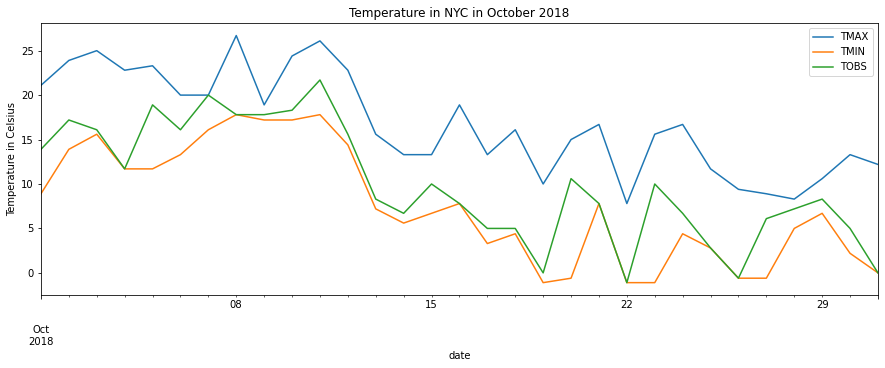

In [8]:
wide_df.plot(
    kind='line', y=['TMAX', 'TMIN', 'TOBS'], x='date', 
    title='Temperature in NYC in October 2018',
    figsize=(15, 5)
 ).set_ylabel('Temperature in Celsius')
plt.show()

In [9]:
long_df.head(6)

,date,datatype,value
0,2018-10-01,TMAX,21.1
1,2018-10-01,TMIN,8.9
2,2018-10-01,TOBS,13.9
3,2018-10-02,TMAX,23.9
4,2018-10-02,TMIN,13.9
5,2018-10-02,TOBS,17.2


In [11]:
long_df.shape

(93, 3)

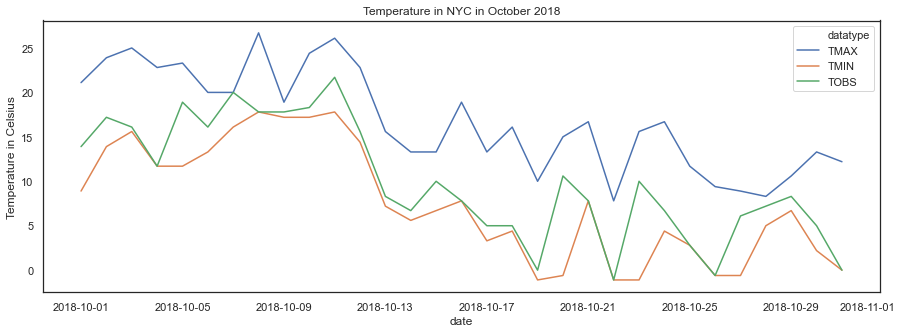

In [13]:
import seaborn as sns
sns.set(rc={'figure.figsize':(15, 5)}, style='white')
ax = sns.lineplot(
     data=long_df, hue='datatype', y='value', x='date'
)
ax.set_ylabel('Temperature in Celsius')
ax.set_title('Temperature in NYC in October 2018')
plt.show()

/opt/anaconda3/envs/pandas_plyground/lib/python3.8/site-packages/seaborn/axisgrid.py:911: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(curr_labels, **kwargs)


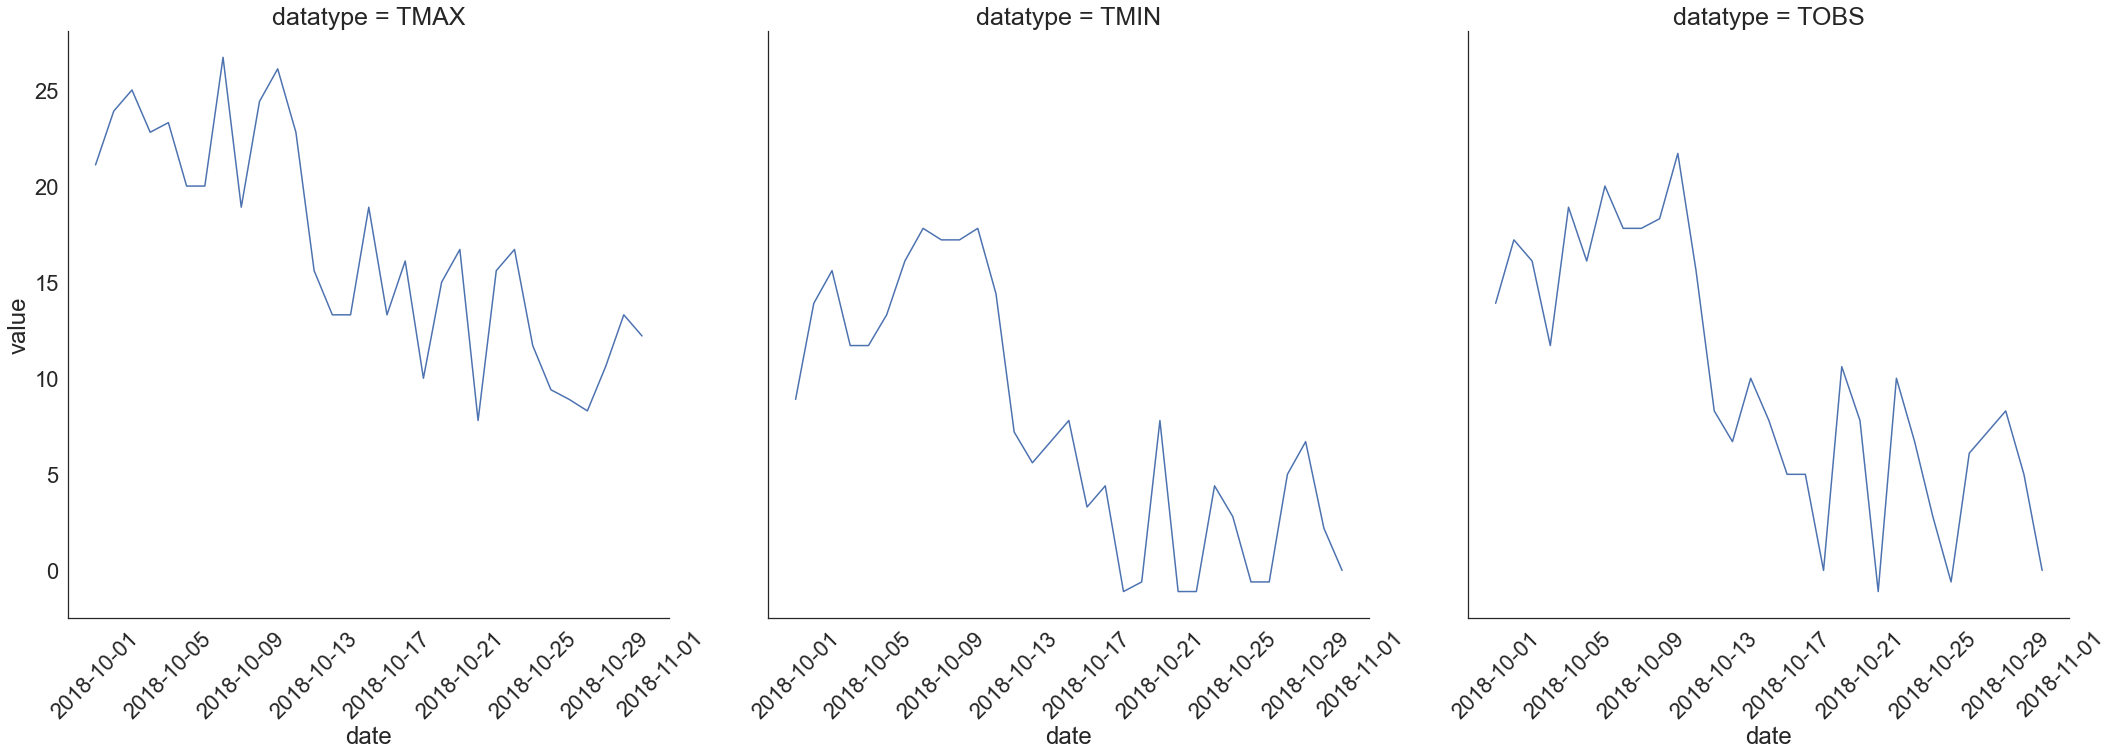

In [14]:
sns.set(
    rc={'figure.figsize':(20, 10)}, style='white', font_scale=2 
)
g = sns.FacetGrid(long_df, col="datatype", height=10)
g = g.map(plt.plot, "date", "value")
g.set_titles(size=25)
g.set_xticklabels(rotation=45)
plt.show()